In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
!python -c "import keras; print(keras.__version__)"

2.3.1

Using TensorFlow backend.


### Load image data from MNIST

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


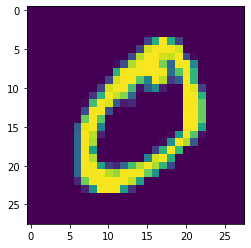

In [5]:
plt.imshow(X_train[1])

### Preprocess input data for Keras

In [6]:
# transform our dataset from having shape (n, width, height) to (n, depth, width, height).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
print(X_train.shape)

(60000, 28, 28, 1)


In [8]:
# convert our data type to float32 and normalize our data values to the range [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Preprocess class labels for Keras

In [9]:
print(y_train.shape)

(60000,)


In [10]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [11]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
print(Y_train.shape)

(60000, 10)


### Define model architecture

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Compile model

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fit model on training data

In [15]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.2119 - accuracy: 0.9353
Epoch 2/10
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0903 - accuracy: 0.9726
Epoch 3/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0699 - accuracy: 0.9786
Epoch 4/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0582 - accuracy: 0.9825
Epoch 5/10
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0501 - accuracy: 0.9851
Epoch 6/10
60000/60000 [==============================] - 358s 6ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 7/10
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0378 - accuracy: 0.9883
Epoch 8/10
60000/60000 [==============================] - 357s 6ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 9/10
60000/60000 [==============================] - 358s 6ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 10/10
60000/60000 [=====================

### Evaluate model on test data

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
score

[0.02911032413748244, 0.9922999739646912]